In [2]:

from src.data_manager.rflab_np_manager import RflabNpDataManager
import numpy as np
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, BatchNormalization, LSTM, Conv1D, Reshape, Dropout
from keras.datasets import imdb
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)


rflab_manager = RflabNpDataManager()
dataset = rflab_manager.load()

X_train = dataset[2:, 0:-1]
X_train[np.isnan(X_train)] = 0.
print('Shape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])
# X_train = np.reshape(X_train, (X_train.shape[0], 400, 1))
print('ReShape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])

print('before nornalize')
print(X_train[0])
row_sums = X_train.sum(axis=1)
X_train = X_train / row_sums[:, np.newaxis]
print('after nornalize')
print(X_train[0])

Y_train = dataset[2:, -1]
print('Class labels:')
print(np.unique(Y_train))

# Convert labels to categorical one-hot encoding
one_hot_labels = to_categorical(Y_train, num_classes=9)
print(one_hot_labels.shape)
print(np.unique(one_hot_labels))

model = Sequential()
num_classes = 9
time_series = X_train.shape[1]
model.add(Reshape((400, 1), input_shape=(400,)))
model.add(SimpleRNN(64, input_shape=(None, 400, 1), return_sequences=True))
model.add(SimpleRNN(8))
# model.add(Dense(1024, input_dim=400, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, one_hot_labels, epochs=50, batch_size=65, validation_split=0.3)
y_pred = model.predict(X_train[0:1])
# print(X_train[0:1])
# print('X_pred')
# print(X_train[0:1])
print('y_pred')
print(y_pred)

plt.plot(X_train[140],
         label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Импульс')
plt.legend()
plt.savefig('emg_example.png')

Shape of one row data:
(1478, 400)
(400,)
[ 6.66234127e+005  2.79610421e+009  4.20498314e+005  2.41865377e+008
  3.04773698e+008  1.33246825e+006  3.86984603e+009  1.44713157e+005
  1.52386849e+008  8.73782565e+007  3.15695362e+003  7.43765123e+008
  7.89238406e+002  2.69118920e+007  7.42702503e+006  1.11976212e+002
  1.41202081e+008 -2.53392831e+001  4.20498438e+005  1.66558532e+005
 -6.13452378e+001  1.62521540e+007 -1.49352368e+003  1.66558594e+005
  3.26886598e+238  3.00489544e-307  9.37908771e-196 -3.73651724e-230
  3.44209773e+012 -2.60706991e-003 -4.09624439e+005  3.76807813e+005
 -4.09624312e+005  1.49925685e+000  7.69178751e-011 -2.48502969e+005
  3.33117063e+005 -6.44486124e+005  5.82961919e-001 -1.87593014e-001
 -3.27699551e+006  4.94857320e+003 -3.27699550e+006  1.01634578e-004
 -4.00119096e+001 -2.57794551e+006  5.05112576e+004 -5.15589100e+006
 -2.60707132e-003 -1.01357132e+002 -2.92747151e+006  1.44713156e+005
 -7.95209498e+006 -2.53392907e+001 -6.11259167e-005 -7.318678

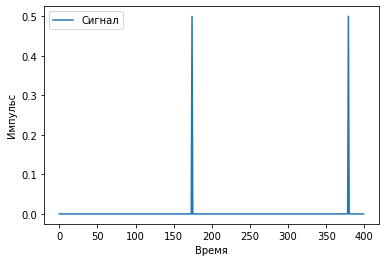

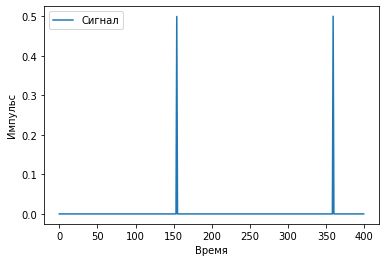

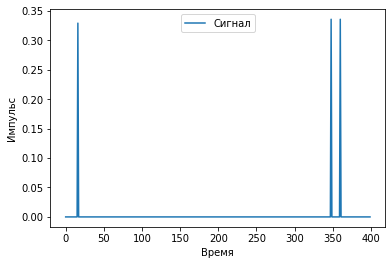

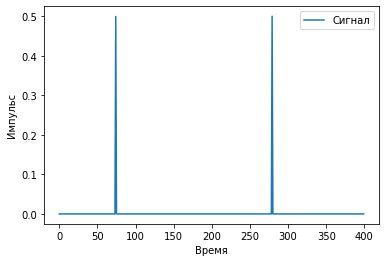

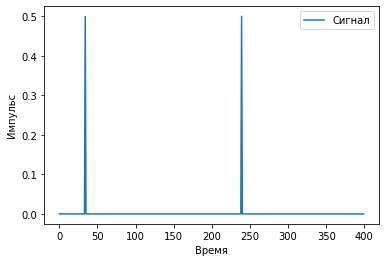

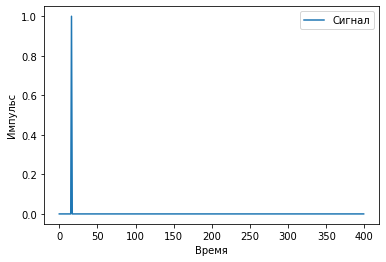

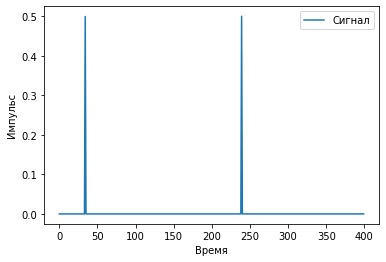

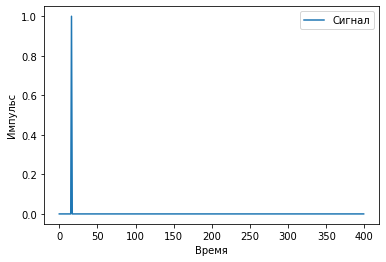

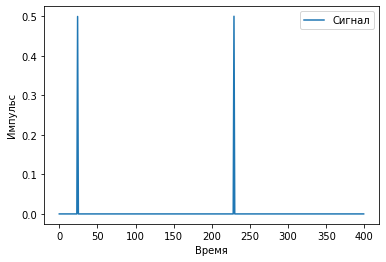

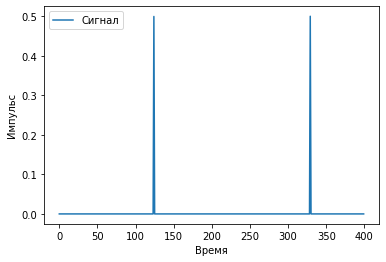

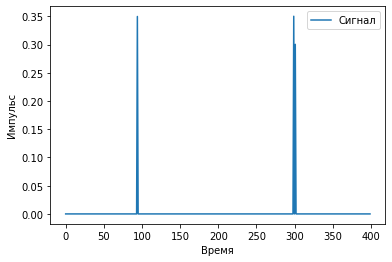

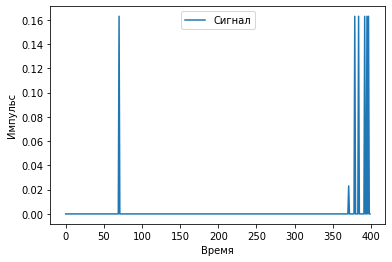

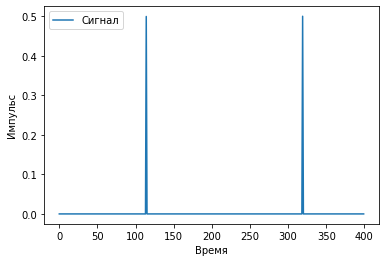

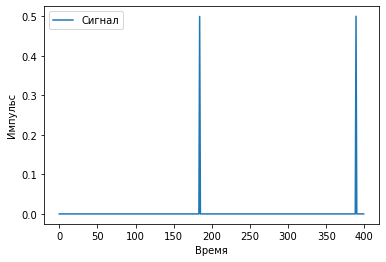

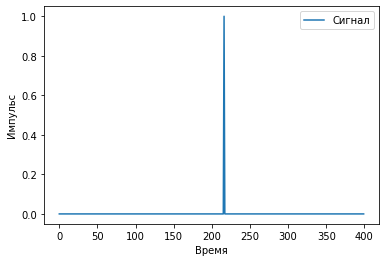

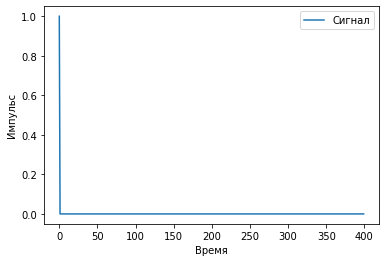

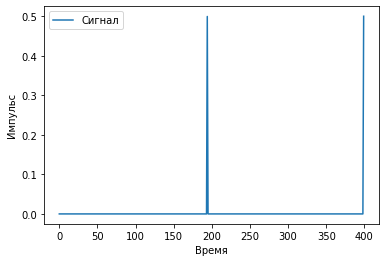

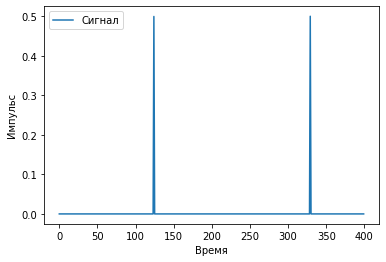

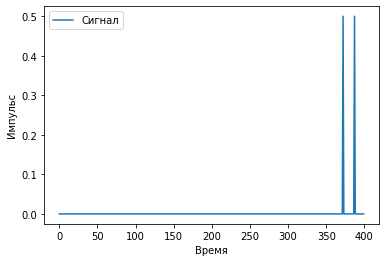

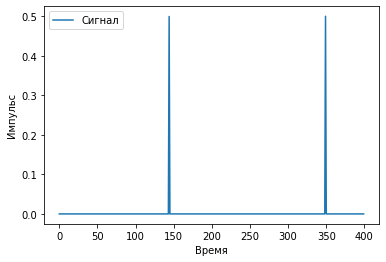

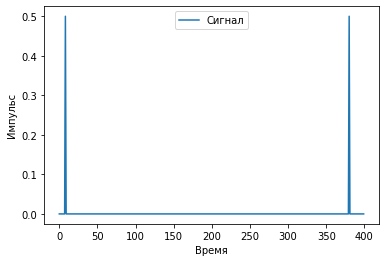

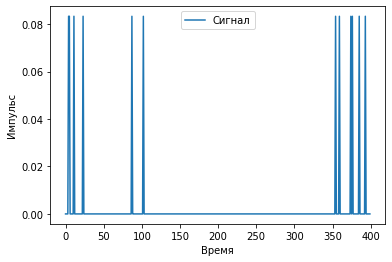

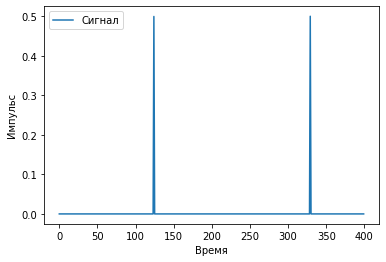

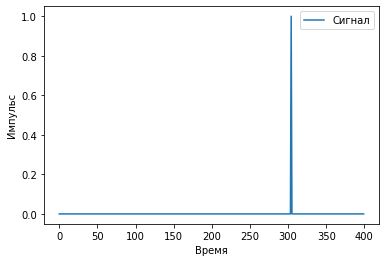

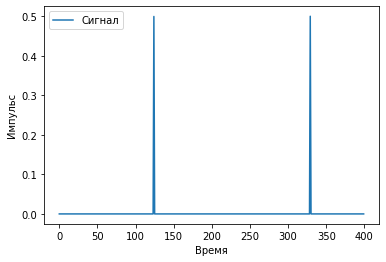

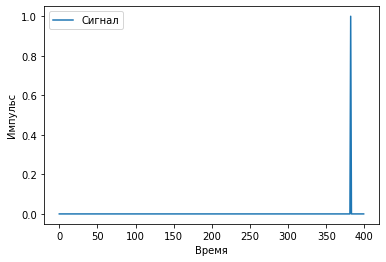

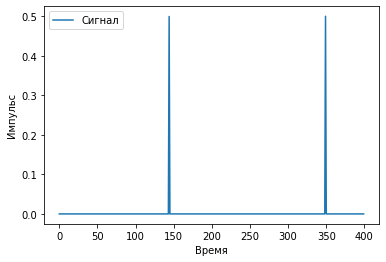

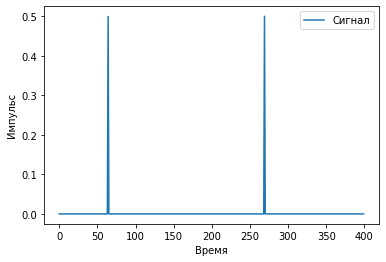

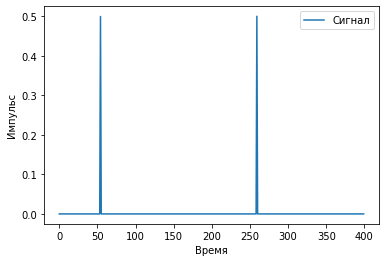

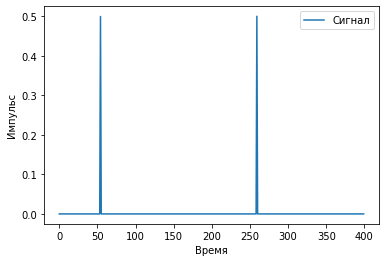

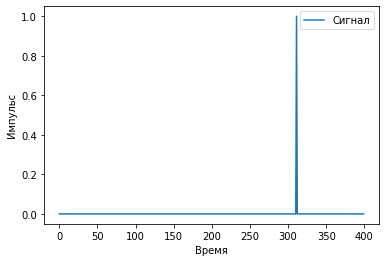

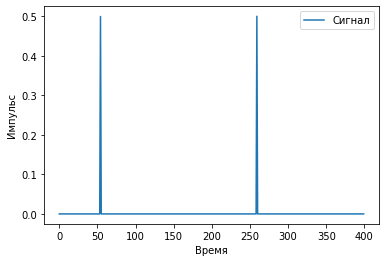

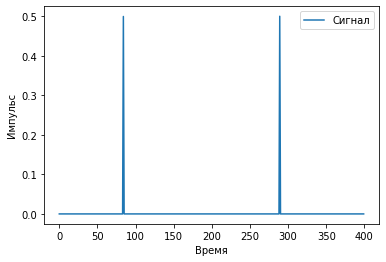

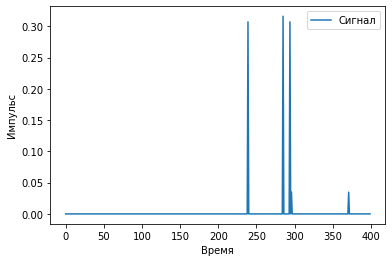

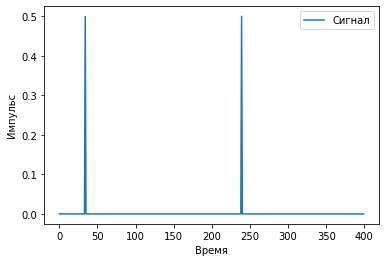

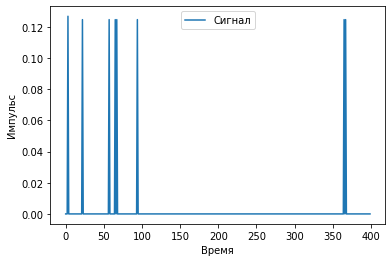

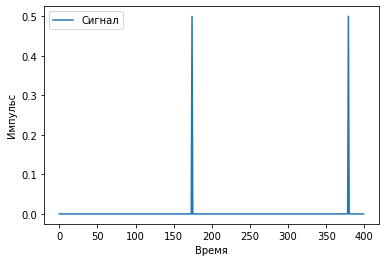

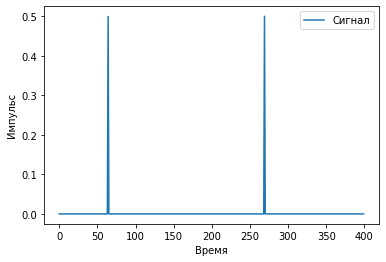

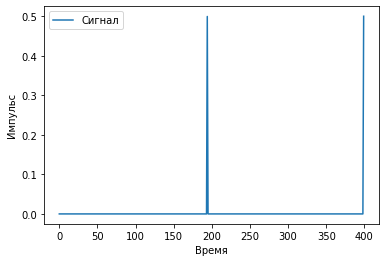

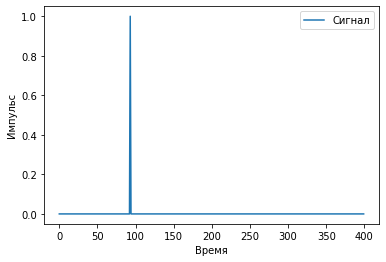

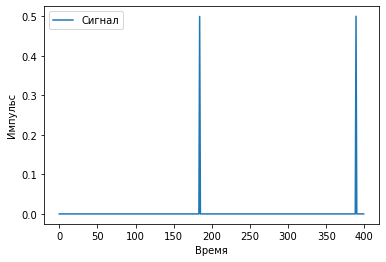

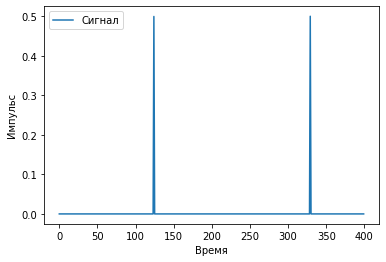

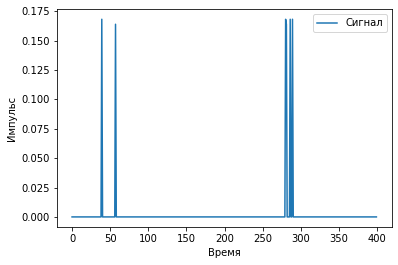

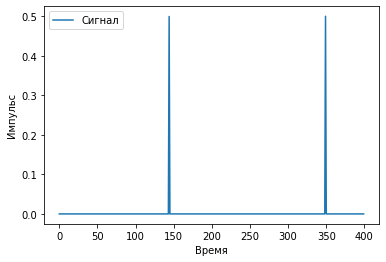

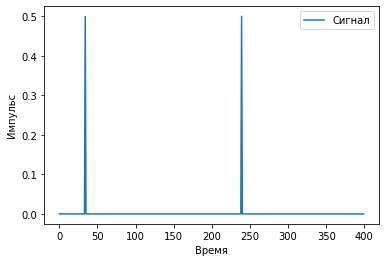

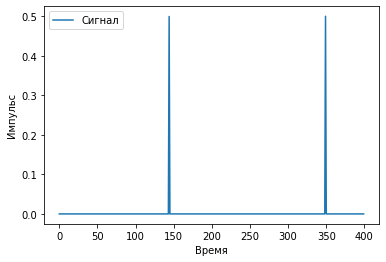

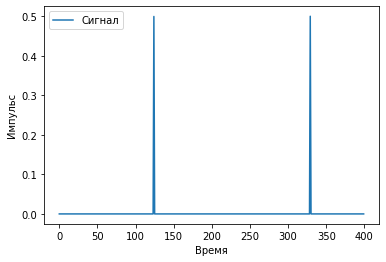

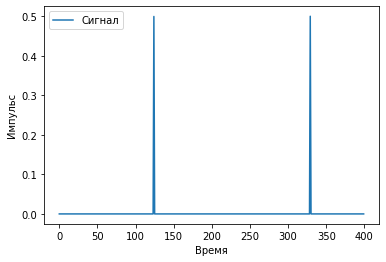

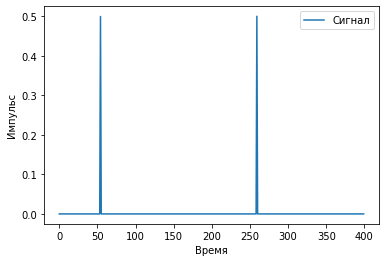

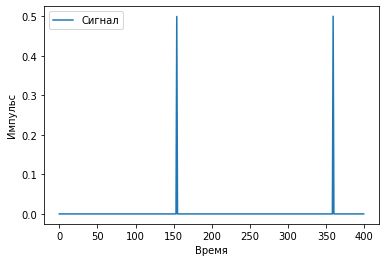

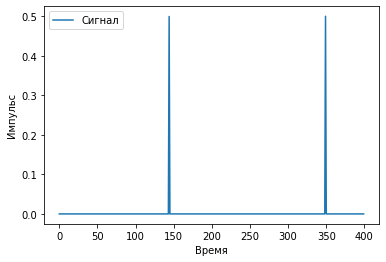

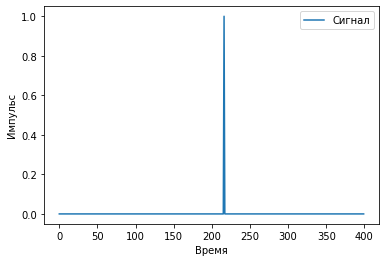

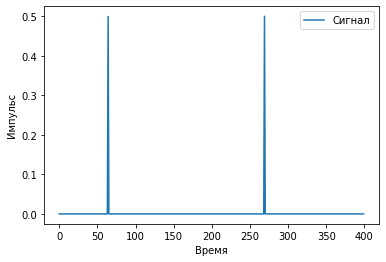

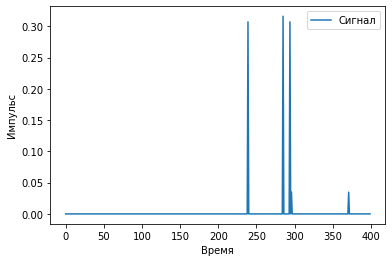

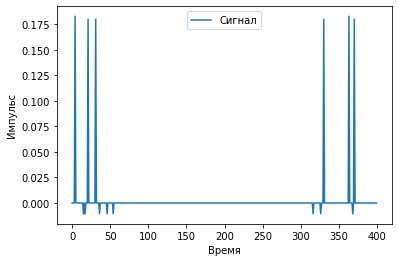

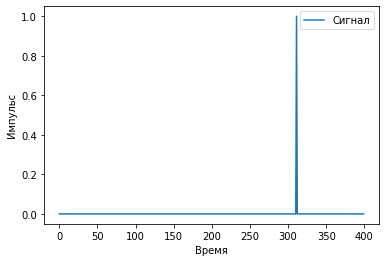

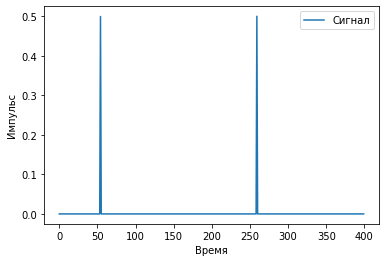

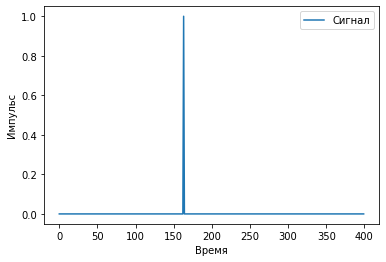

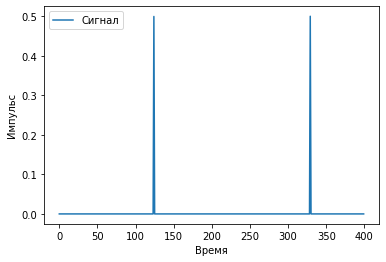

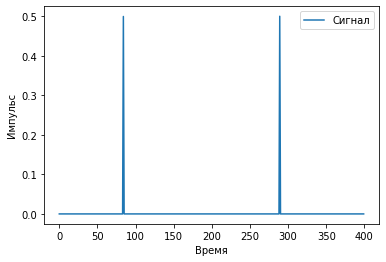

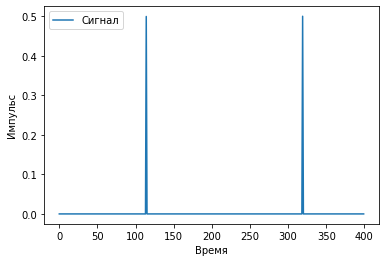

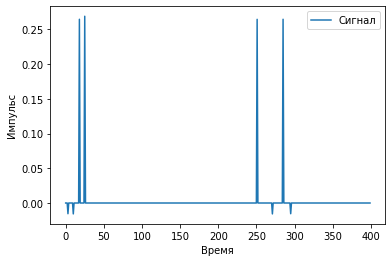

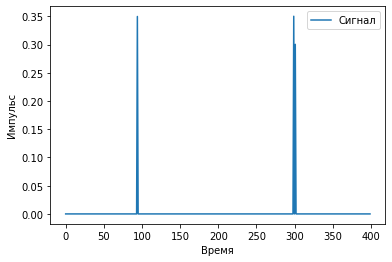

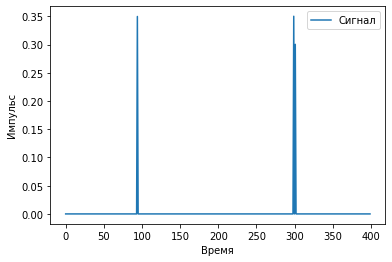

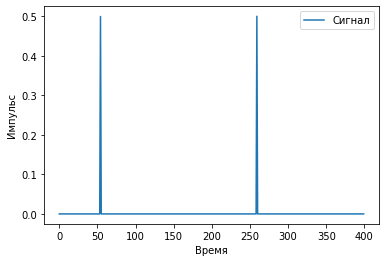

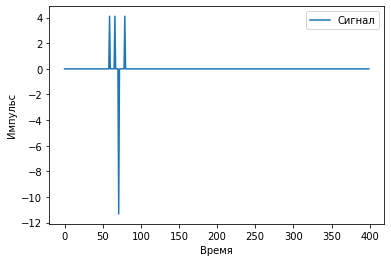

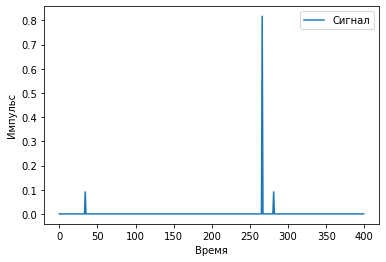

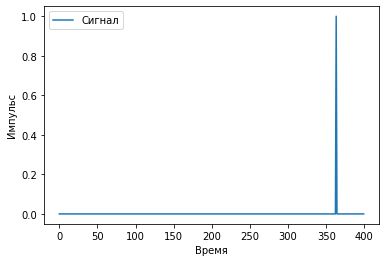

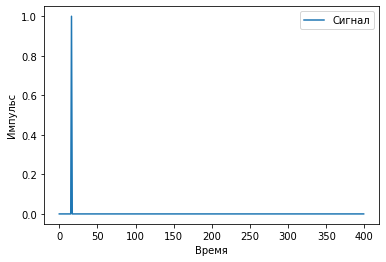

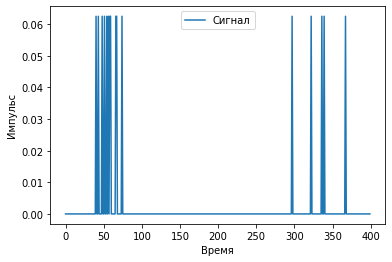

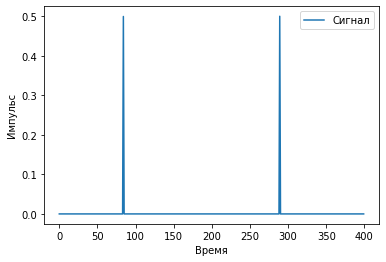

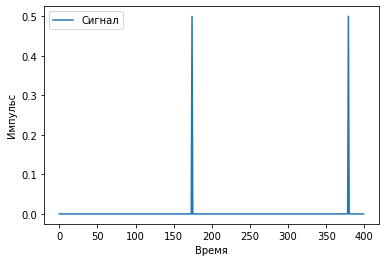

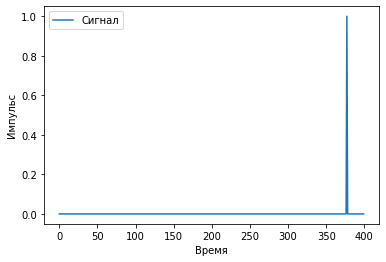

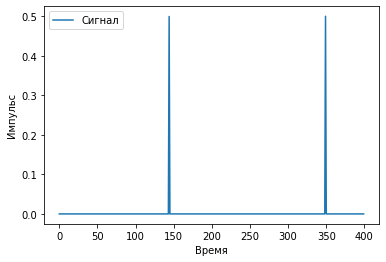

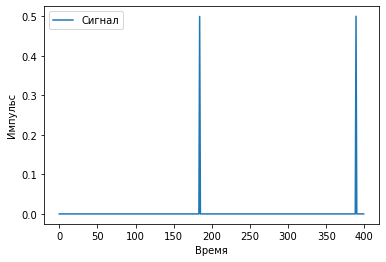

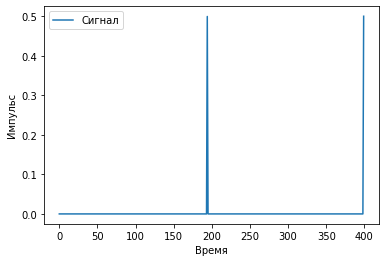

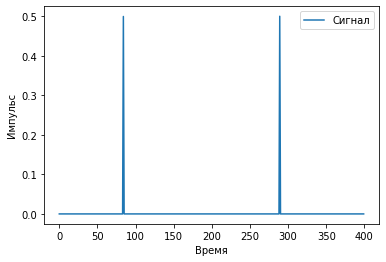

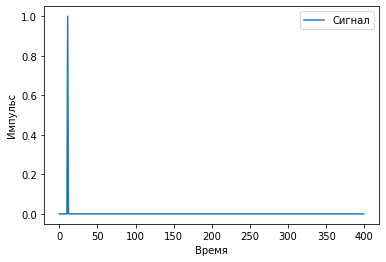

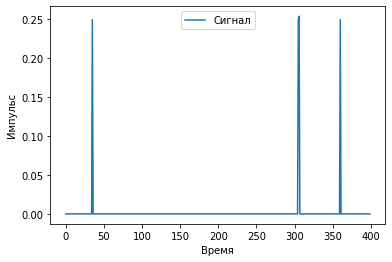

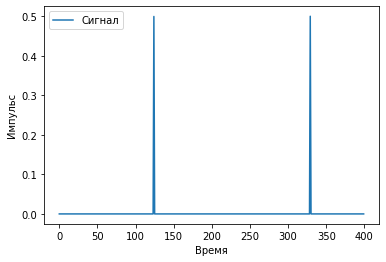

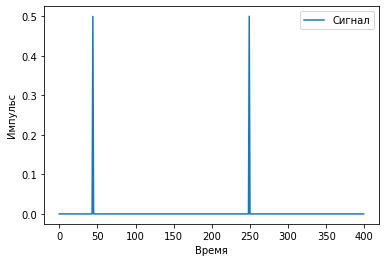

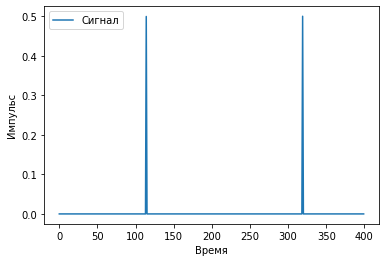

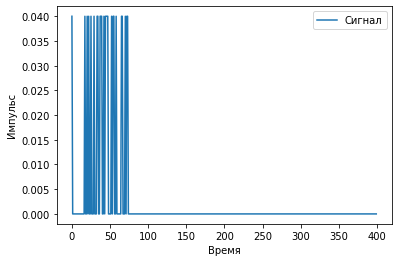

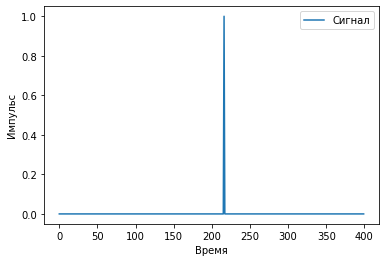

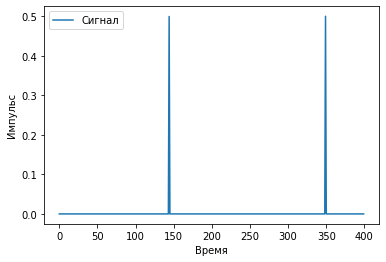

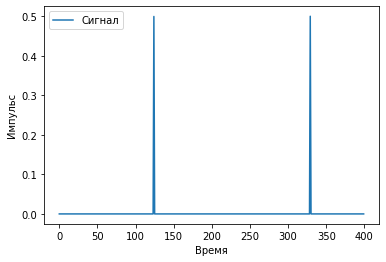

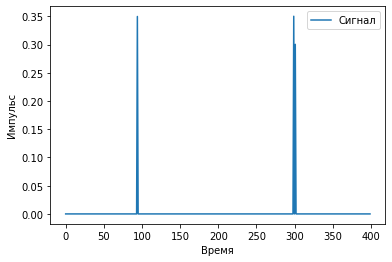

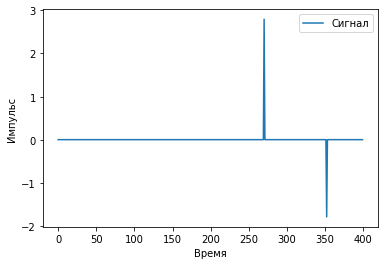

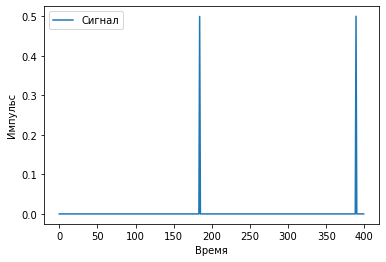

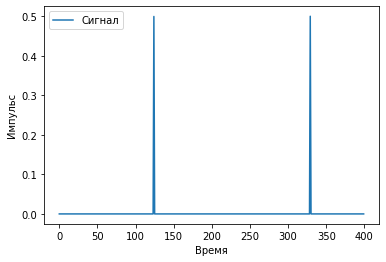

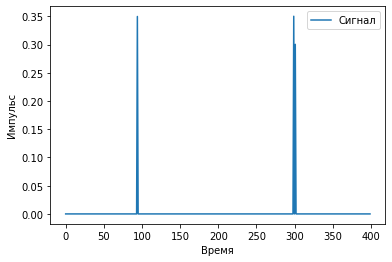

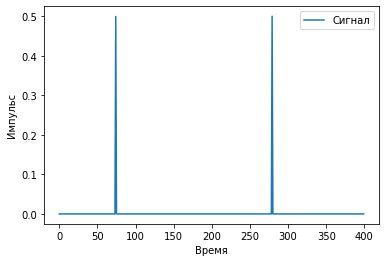

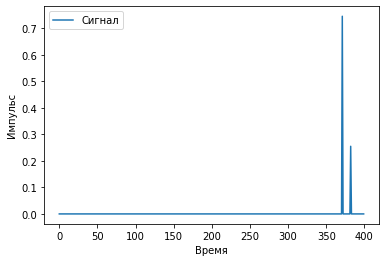

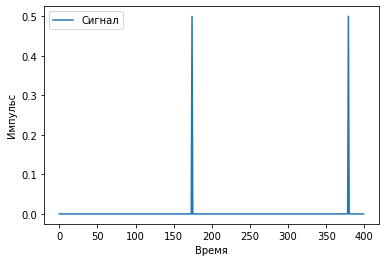

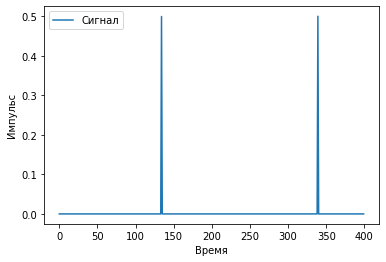

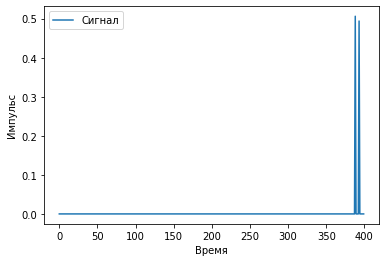

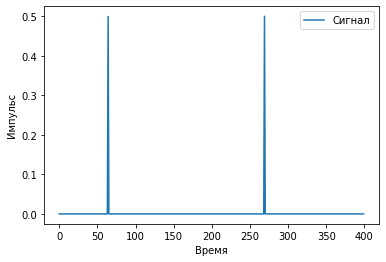

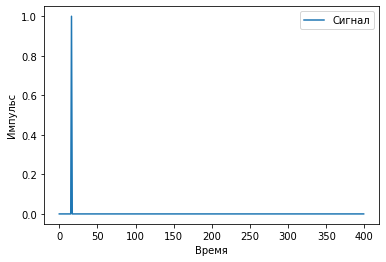

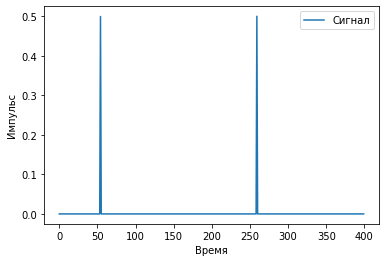

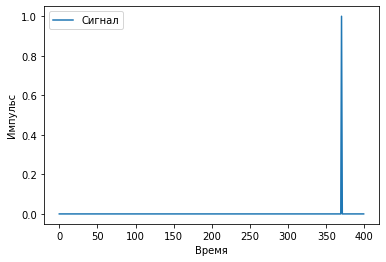

In [6]:
%matplotlib inline

idx = np.random.randint(0, X_train.shape[0], size=100)
for X_i in X_train[idx,:]:
    plt.plot(X_i.reshape(400),
             label='Сигнал')
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()

In [59]:
from scipy import signal
import pickle
import sys
import os
from random import shuffle
    
from scipy import signal


def filter_signal(x):
    N = 10
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs / 2)
    y = signal.lfilter(h, 1.0, x)
    return y

path = "/Users/antonvasilev/PyCharmProjects/emg-interface/nine_movs_six_sub_split/"

# path where you want to save trained model and some other files
sec_path = "./"
persons = [1, 2, 3, 4, 5, 6]

def create_dataset(file_path, persons, moves=None):
    if (moves is None):
        moves = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    
    path = file_path + "{}_{}.pickle"
    sgn = []
    lbl = []
    for i in persons:
        for j in moves:
            with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
                data = pickle.load(fp)

            for k in range(np.shape(data)[0]):
                sgn.append(data[k])
                lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.8 * len(sgn))]
    train_labels = lbl[0:int(0.8 * len(lbl))]
    val_signals = sgn[int(0.8 * len(sgn)):]
    val_labels = lbl[int(0.8 * len(lbl)):]
    # test_signals = sgn[int(0.8*len(sgn)):]
    # test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    # test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels

# only two hand moves take in dataset
moves = [0, 1]

(X_train2,train_labels,__,___ ) = create_dataset(path, persons, moves)

(593, 400)


(474, 400)
(474, 2)


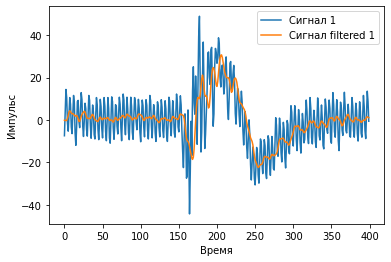

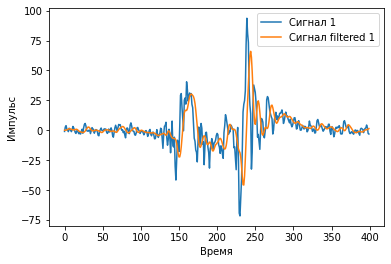

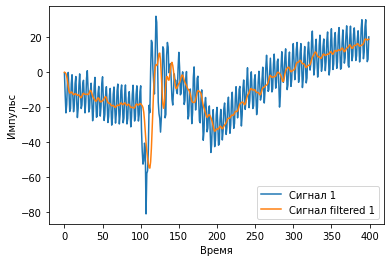

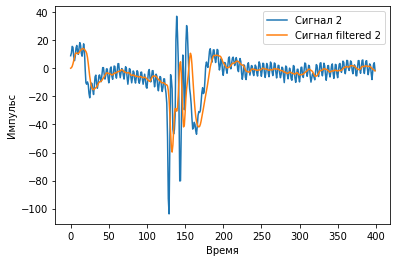

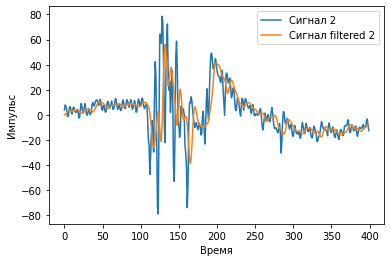

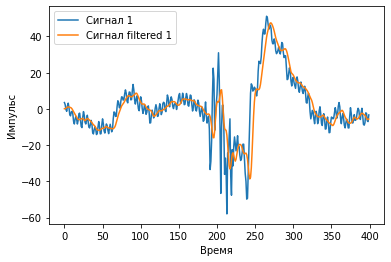

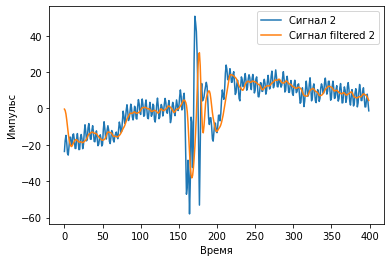

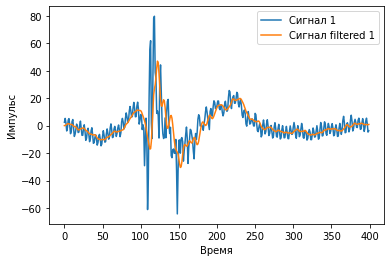

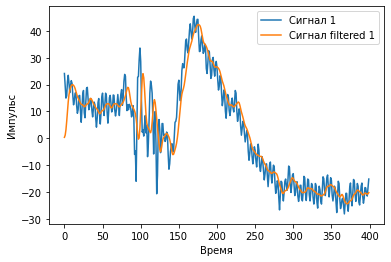

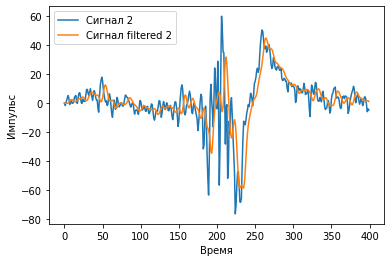

In [62]:
X_train2 = np.array(X_train2)
print(X_train2.shape)
print(train_labels.shape)
idx = np.random.randint(0, X_train2.shape[0], size=10)
X_train_filtered = []
for X in X_train2:
    X_train_filtered.append(filter_signal(X))
X_train_filtered = np.array(X_train_filtered)

for i in idx:
    X_i = X_train2[i]
    plt.plot(X_i,
             label='Сигнал ' + str(np.argmax(train_labels[i]) + 1))
    plt.plot(X_train_filtered[i],
             label='Сигнал filtered ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()


In [78]:
# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_filtered # X_train2
Y_train_res = train_labels

# filtration

# row_sums = X_train_res.sum(axis=1)
# X_train_res = X_train_res / row_sums[:, np.newaxis]

num_classes = Y_train_res.shape[1]
time_series = X_train_res.shape[1]

model = Sequential()
model.add(Reshape((100, 4), input_shape=(400,)))
model.add(SimpleRNN(64, input_shape=(None, 400, 1), return_sequences=True))
model.add(Dropout(0.1))
model.add(SimpleRNN(32, return_sequences=True))
model.add(Dropout(0.1))
model.add(SimpleRNN(8))
# model.add(Dense(1024, input_dim=400, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train_res, Y_train_res, epochs=50, batch_size=65, validation_split=0.3)


Epoch 1/50
6/6 [==============================] - 3s 123ms/step - loss: 0.7603 - accuracy: 0.4924 - val_loss: 0.7147 - val_accuracy: 0.5524
Epoch 2/50
6/6 [==============================] - 0s 63ms/step - loss: 0.6841 - accuracy: 0.5831 - val_loss: 0.7083 - val_accuracy: 0.5245
Epoch 3/50
6/6 [==============================] - 0s 52ms/step - loss: 0.7031 - accuracy: 0.5227 - val_loss: 0.7007 - val_accuracy: 0.5245
Epoch 4/50
6/6 [==============================] - 0s 56ms/step - loss: 0.6780 - accuracy: 0.5801 - val_loss: 0.7115 - val_accuracy: 0.5315
Epoch 5/50
6/6 [==============================] - 0s 55ms/step - loss: 0.6864 - accuracy: 0.5619 - val_loss: 0.7338 - val_accuracy: 0.4895
Epoch 6/50
6/6 [==============================] - 0s 55ms/step - loss: 0.6719 - accuracy: 0.5861 - val_loss: 0.7402 - val_accuracy: 0.4685
Epoch 7/50
6/6 [==============================] - 0s 61ms/step - loss: 0.6735 - accuracy: 0.5589 - val_loss: 0.7218 - val_accuracy: 0.5245
Epoch 8/50
6/6 [==========

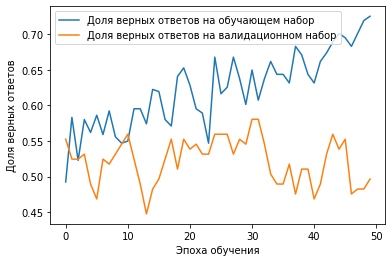

In [79]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем набор')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на валидационном набор')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.savefig('simple_rnn_history_with_2_moves_normal_data.png')

1/1 [==============================] - 0s 217ms/step
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.
   0.          0.         -0.          0.         -0.          0.
   0.49970837  0.          0.         -0.          0.         -0.
  -0.          0.         -0.          0.          0.         -0.
   0.         -0.          0.         -0.         -0.          0.
  -0.          0.         -0.         -0.          0.         -0.
  -0.         -0.         -0.          0.         -0.         -0.
  -0.         -0.          0.         -0.          0.         -0.
  -0.          0.         -0.         -0.         -0.         -0.
   0.         -0.          0.         -0.         -0.          0.
  -0.         -0.         -0.         -0.          0.         -0.
   0.         -0.         -0.          0.         -0.          0.
  -0.         -0.      

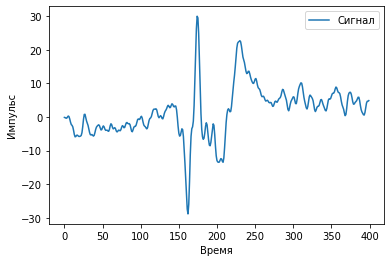

In [71]:
y_pred = model.predict(np.array(X_train_res[0:1]))
print(X_train[0:1])
# print('X_pred')
# print(X_train[0:1])
print('y_pred')
print(y_pred)
print('y_real')
print(Y_train_res[0])

plt.plot(X_train_res[140],
         label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Импульс')
plt.legend()
plt.savefig('emg_example.png')